In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [65]:
df = pd.read_csv("data/Canadian_Health_Survey_Sample_cleaned.csv")

### Analyzing dataset

In [66]:
df.head()

,Province,Gender,Age,Income,BMI,PhysicalActivity,Smoking,SelfRatedHealth,StressLevel,BMI_Category,IncomeBracket,SelfRatedHealth_Num
0,Ontario,Female,59,80572.0,25.7,3.8,Yes,Good,6,Overweight,80-110k,3
1,New Brunswick,Male,38,125739.0,24.2,3.4,No,Good,9,Normal,>110k,3
2,Saskatchewan,Male,30,75947.0,28.3,3.9,No,Excellent,10,Overweight,50-80k,5
3,Saskatchewan,Female,79,113966.0,31.2,1.6,No,Fair,6,Obese,>110k,2
4,Newfoundland and Labrador,Female,24,101828.0,27.8,4.5,Yes,Good,5,Overweight,80-110k,3


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Province             825 non-null    object 
 1   Gender               825 non-null    object 
 2   Age                  825 non-null    int64  
 3   Income               825 non-null    float64
 4   BMI                  825 non-null    float64
 5   PhysicalActivity     825 non-null    float64
 6   Smoking              825 non-null    object 
 7   SelfRatedHealth      825 non-null    object 
 8   StressLevel          825 non-null    int64  
 9   BMI_Category         825 non-null    object 
 10  IncomeBracket        825 non-null    object 
 11  SelfRatedHealth_Num  825 non-null    int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 77.5+ KB


In [68]:
df.describe(include='all')

,Province,Gender,Age,Income,BMI,PhysicalActivity,Smoking,SelfRatedHealth,StressLevel,BMI_Category,IncomeBracket,SelfRatedHealth_Num
count,825,825,825.000000,825.000000,825.000000,825.000000,825,825,825.000000,825,825,825.000000
unique,10,2,NaN,NaN,NaN,NaN,2,5,NaN,4,4,NaN
top,Quebec,Male,NaN,NaN,NaN,NaN,No,Good,NaN,Overweight,50-80k,NaN
freq,97,426,NaN,NaN,NaN,NaN,640,254,NaN,333,394,NaN
mean,NaN,NaN,49.408485,77545.210909,27.472039,3.503246,NaN,NaN,5.294545,NaN,NaN,3.208485
std,NaN,NaN,18.187646,22145.238035,4.953750,1.899122,NaN,NaN,2.121156,NaN,NaN,1.147042
min,NaN,NaN,18.000000,5000.000000,13.500000,0.000000,NaN,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,NaN,33.000000,64115.000000,24.200000,2.100000,NaN,NaN,4.000000,NaN,NaN,2.000000
50%,NaN,NaN,49.000000,78130.000000,27.488861,3.500000,NaN,NaN,5.000000,NaN,NaN,3.000000
75%,NaN,NaN,66.000000,90100.000000,30.700000,4.700000,NaN,NaN,7.000000,NaN,NaN,4.000000


### Cleaning & Standardizing Categories
- Normalizing gender values and smoking values

In [69]:
# normalizing gender values to Male or Female
df['Gender'] = df['Gender'].str.lower()
df['Gender'] = df['Gender'].replace({
    'male': 'Male',
    'm': 'Male',
    'female': 'Female',
    'f': 'Female'
})

# normalizing smoking to Yes or No
df['Smoking'] = df['Smoking'].str.lower()
df['Smoking'] = df['Smoking'].replace({
    'yes': 'Yes',
    'y': 'Yes',
    'no': 'No',
    'n': 'No'
})

### Data Cleaning
- Filled missing BMI and Income values using averages (mean/median) to preserve dataset size without distorting quantitative distributions.
- Dropped rows with missing StressLevel because it is ordinal, and imputing an ordered scale would distort the meaning of the categories.
- Filled missing PhysicalActivity values using the mean, since it is a discrete numeric variable and will not affect categorical encodings in later visualizations.

In [70]:
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())
df['Income'] = df['Income'].fillna(df['Income'].median())
df = df.dropna(subset=['StressLevel'])
df['PhysicalActivity'] = df['PhysicalActivity'].fillna(df['PhysicalActivity'].mean())

## Enforcing Correct Data Types

In [71]:
df['Age'] = df['Age'].astype(int)
df['Income'] = df['Income'].astype(float)
df['BMI'] = df['BMI'].astype(float)
df['StressLevel'] = df['StressLevel'].astype(int)

### Enhancing the Dataset with Derived Features

In [72]:
# create new column
df['BMI_Category'] = None

# create column values based on constraints
df.loc[df['BMI'] < 18.5, 'BMI_Category'] = 'Underweight'
df.loc[(df['BMI'] >= 18.5) & (df['BMI'] <= 24.9), 'BMI_Category'] = 'Normal'
df.loc[(df['BMI'] >= 25) & (df['BMI'] <= 29.9), 'BMI_Category'] = 'Overweight'
df.loc[df['BMI'] >= 30, 'BMI_Category'] = 'Obese'

# create new column
df['IncomeBracket'] = None

# create column values based on constraints
df.loc[df['Income'] < 50000, 'IncomeBracket'] = '<50k'
df.loc[(df['Income'] >= 50000) & (df['Income'] < 80000), 'IncomeBracket'] = '50-80k'
df.loc[(df['Income'] >= 80000) & (df['Income'] < 110000), 'IncomeBracket'] = '80-110k'
df.loc[df['Income'] >= 110000, 'IncomeBracket'] = '>110k'

### Bar Chart - Average Life/Health Proxy by Province Analysis
- This bar chart is created to compare the average self-rated health score across provinces.

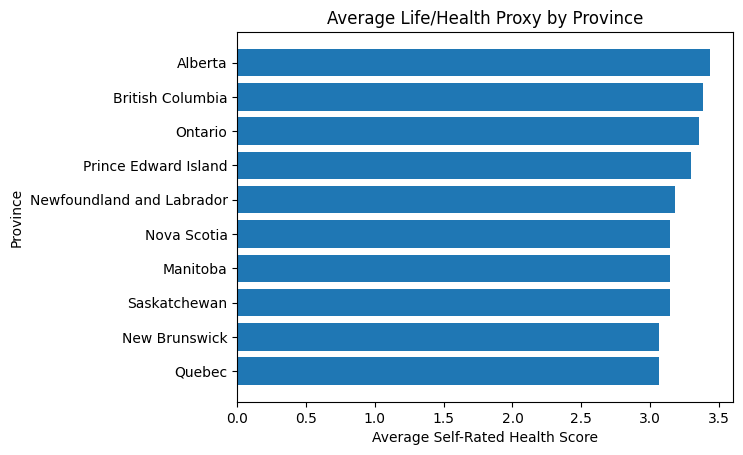

In [73]:
# create new column
df['SelfRatedHealth_Num'] = None

# create column values based on constraints
df.loc[df['SelfRatedHealth'] == 'Poor', 'SelfRatedHealth_Num'] = 1
df.loc[df['SelfRatedHealth'] == 'Fair', 'SelfRatedHealth_Num'] = 2
df.loc[df['SelfRatedHealth'] == 'Good', 'SelfRatedHealth_Num'] = 3
df.loc[df['SelfRatedHealth'] == 'Very Good', 'SelfRatedHealth_Num'] = 4
df.loc[df['SelfRatedHealth'] == 'Excellent', 'SelfRatedHealth_Num'] = 5

# group each province
groups = df.groupby('Province')

# get the average score for each province
avg_score = groups['SelfRatedHealth_Num'].mean()
avg_score = avg_score.sort_values() # better visualization

# plot
plt.barh(avg_score.index, avg_score.values)

plt.xlabel('Average Self-Rated Health Score')
plt.ylabel('Province')
plt.title('Average Life/Health Proxy by Province')

plt.show()


### Scatter Plot - Income vs BMI Analysis
- This scatter plot is created to examine the relationship between Income and BMI while also showing how StressLevel and Gender influence the pattern.

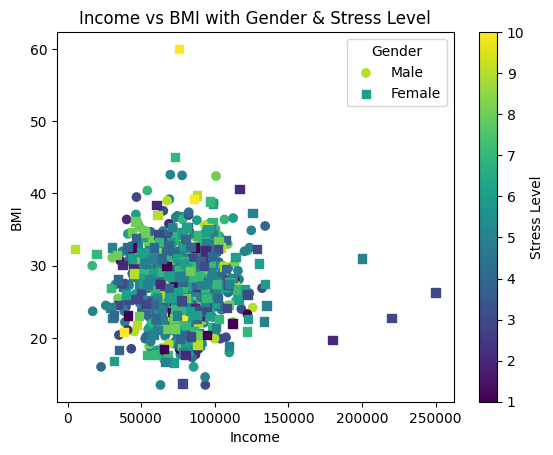

In [74]:
# create two new dataframes only containing the gender column where one is only males and the other is only females
male_df = df[df['Gender'] == 'Male']
female_df = df[df['Gender'] == 'Female']

# for males
plt.scatter(
    male_df['Income'],
    male_df['BMI'],
    c = male_df['StressLevel'], # colormap with stress level
    cmap = 'viridis',
    marker = 'o', # circle for males
    label = 'Male' # for legend
)

# for females
plt.scatter(
    female_df['Income'],
    female_df['BMI'],
    c = female_df['StressLevel'], # colormap with stress level
    cmap = 'viridis',
    marker = 's', # squares for females
    label = 'Female' # for legend
)

# Colorbar for StessLevel
colorbar = plt.colorbar()
colorbar.set_label('Stress Level')

plt.xlabel('Income')
plt.ylabel('BMI')
plt.title('Income vs BMI with Gender & Stress Level')

plt.legend(title='Gender')
plt.show()

### Diverging Bar Chart - Life Proxy Difference by Province Analysis
- This diverging bar chart is used to show how each province’s average self-rated health score differs from the overall national average.
- The values can be both above and below zero, a diverging visualization is the correct choice as it highlights positive vs. negative deviation around a meaningful midpoint.

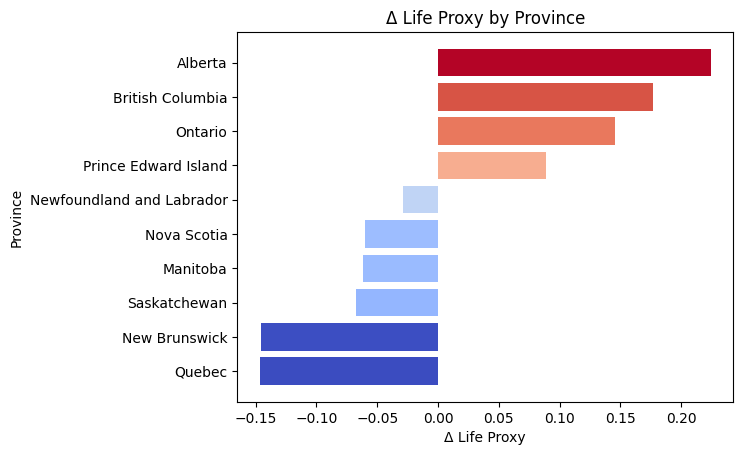

In [75]:
groups = df.groupby('Province')

# get the average score for each province
province_avg = groups['SelfRatedHealth_Num'].mean()

# get the overall average
ovr_avg = df['SelfRatedHealth_Num'].mean()

life_proxy = province_avg - ovr_avg
life_proxy = life_proxy.sort_values()
life_proxy = life_proxy.astype(float)

# color map
cmap = plt.cm.coolwarm # choose coolwarm color map

low = life_proxy.min()
high = life_proxy.max()
center = 0

color_map = mcolors.TwoSlopeNorm(vmin = low, vcenter = center, vmax = high)
colors = cmap(color_map(life_proxy.values)) # mapping each value to a color


plt.barh(life_proxy.index, life_proxy.values, color = colors)

plt.xlabel('Δ Life Proxy')
plt.ylabel('Province')
plt.title('Δ Life Proxy by Province')

plt.show()




